In [78]:
#Carga de librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import pandas.util.testing as tm

from sklearn.datasets import load_iris
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression 

In [91]:
#carga de dataset
iris = load_iris()
x = iris.data
y = iris.target
class_names = iris.target_names

#Transformando a Dataframe
df = pd.DataFrame(x,columns = iris.feature_names)
df['species_id'] = y
species_map = {0:'setosa',1:'versicolor',2:'virginica'}
df['species_name'] = df['species_id'].map(species_map)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [80]:
# Aquí su código. PARA ANALISIS ESTADISTICO DE SETOSA
setosa_mask = df['species_name'] == 'setosa'
df[setosa_mask].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


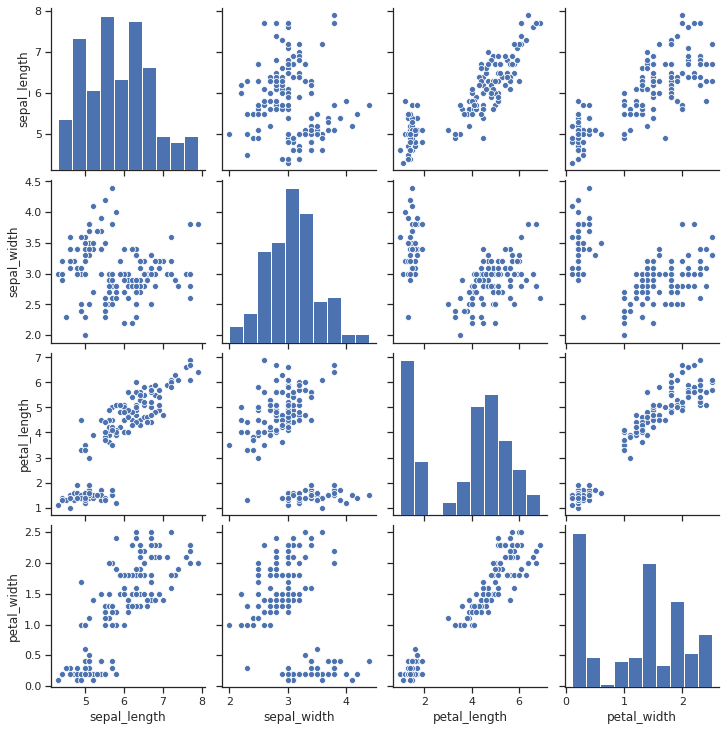

In [81]:
#Pairplot

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

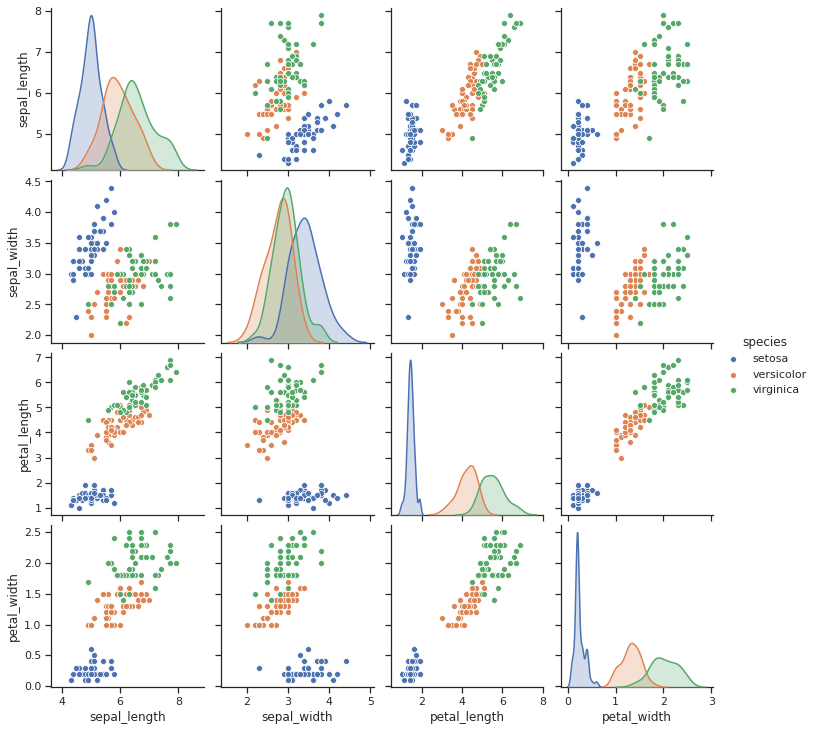

In [82]:
#Pairplot coloreados
g = sns.pairplot(iris, hue="species")

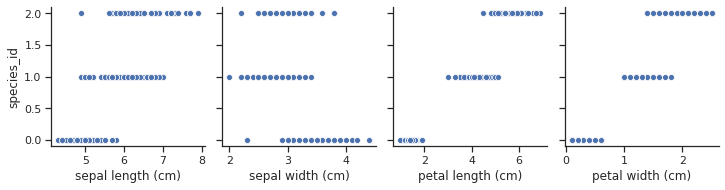

In [92]:
#clasificacion de especies segun caraceristicas de petalos y sepalos

g = sns.pairplot(df,x_vars=iris.feature_names,y_vars=["species_id"])

#nota: Se observa que de las tres especies Setosa es la que se diferencia de forma clara, respecto a las caracteristicas de sus petalos (largo y ancho). 

In [93]:
# Codigo Setosa y no Setosa
y1 = np.where(y==2, 1, y) 
print(y1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [94]:
#Conjunto de entrenamiento y validacion 

x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.33, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
#Comparacion de las probabilidades con los resultados de y_test

#Setosa
probabilidades = log_reg.predict_proba(x_test)
for i in range(0,len(y_test)):
  print (y_test[i],probabilidades[i])

1 [0.01 0.99]
0 [0.95 0.05]
1 [7.76e-06 1.00e+00]
1 [0.01 0.99]
1 [0. 1.]
0 [0.96 0.04]
1 [0.06 0.94]
1 [7.72e-04 9.99e-01]
1 [0. 1.]
1 [0.03 0.97]
1 [0. 1.]
0 [0.97 0.03]
0 [0.98 0.02]
0 [0.97 0.03]
0 [0.97 0.03]
1 [0.01 0.99]
1 [2.05e-04 1.00e+00]
1 [0.03 0.97]
1 [0.01 0.99]
1 [2.77e-04 1.00e+00]
0 [0.96 0.04]
1 [0. 1.]
0 [0.96 0.04]
1 [3.03e-04 1.00e+00]
1 [7.41e-05 1.00e+00]
1 [6.23e-04 9.99e-01]
1 [1.78e-04 1.00e+00]
1 [1.58e-04 1.00e+00]
0 [0.97 0.03]
0 [0.96 0.04]
0 [0.99 0.01]
0 [0.98 0.02]
1 [0.01 0.99]
0 [0.97 0.03]
0 [0.98 0.02]
1 [0. 1.]
1 [0.01 0.99]
0 [0.97 0.03]
0 [0.98 0.02]
0 [0.98 0.02]
1 [0. 1.]
1 [0.01 0.99]
1 [0. 1.]
0 [0.98 0.02]
0 [0.97 0.03]
1 [0.05 0.95]
1 [0. 1.]
1 [6.29e-04 9.99e-01]
1 [0.01 0.99]
1 [1.02e-04 1.00e+00]


In [96]:
model = LogisticRegression(random_state=0).fit(x_train, y_train)
threshold = 0.2
y_pred = (model.predict_proba(x_test)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 0, 31]])

Confusion matrix, without normalization
[[19  0]
 [ 0 31]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


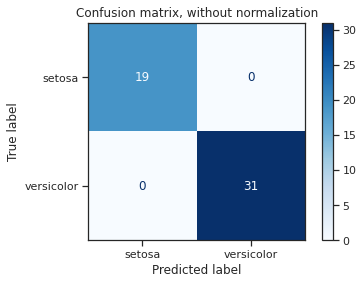

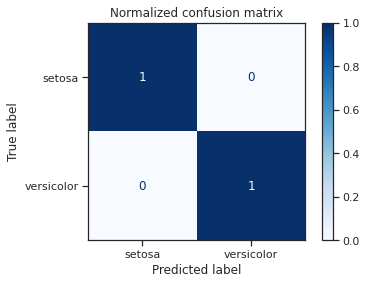

In [98]:
#Matriz de confusion 
from sklearn.metrics import plot_confusion_matrix

classifier = svm.SVC(kernel='linear', C=0.01).fit(x_train, y_train)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)


In [99]:
# Metricas de evaluación. 

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0


In [100]:
## ANALISIS DE VIRGINICA

# Aquí su código. PARA ANALISIS ESTADISTICO DE Virginica
virginica_mask = df['species_name'] == 'virginica'
df[virginica_mask].describe()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,2.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,2.0
25%,6.22500,2.800000,5.100000,1.80000,2.0
50%,6.50000,3.000000,5.550000,2.00000,2.0
75%,6.90000,3.175000,5.875000,2.30000,2.0
max,7.90000,3.800000,6.900000,2.50000,2.0


In [101]:
#CODIGO PARA VIRGINICA Y NO VIRGINICA
y3 = np.where(y==1, 0, y) 
print(y3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [102]:
#Conjunto de entrenamiento y validacion para VIRGINICA

x_train, x_test, y_train, y_test = train_test_split(x, y3, test_size=0.33, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
probabilidades = log_reg.predict_proba(x_test)
for i in range(0,len(y_test)):
  print (y_test[i],probabilidades[i])

0 [0.8 0.2]
0 [1.00e+00 1.69e-05]
2 [0. 1.]
0 [0.78 0.22]
0 [0.71 0.29]
0 [1.00e+00 1.57e-05]
0 [0.98 0.02]
2 [0.18 0.82]
0 [0.74 0.26]
0 [0.96 0.04]
2 [0.27 0.73]
0 [1.00e+00 9.07e-06]
0 [1.00e+00 5.94e-06]
0 [1.00e+00 1.09e-05]
0 [1.0e+00 1.2e-05]
0 [0.69 0.31]
2 [0.04 0.96]
0 [0.97 0.03]
0 [0.83 0.17]
2 [0.06 0.94]
0 [1.00e+00 1.75e-05]
2 [0.43 0.57]
0 [1.00e+00 2.25e-05]
2 [0.07 0.93]
2 [0.02 0.98]
2 [0.13 0.87]
2 [0.07 0.93]
2 [0.03 0.97]
0 [1.00e+00 1.36e-05]
0 [1.00e+00 1.77e-05]
0 [1.00e+00 3.44e-06]
0 [1.e+00 1.e-05]
0 [0.88 0.12]
0 [1.00e+00 1.58e-05]
0 [1.00e+00 8.95e-06]
2 [0.3 0.7]
0 [0.82 0.18]
0 [1.00e+00 1.07e-05]
0 [1.00e+00 8.43e-06]
0 [1.00e+00 6.97e-06]
2 [0.24 0.76]
0 [0.78 0.22]
0 [0.74 0.26]
0 [1.0e+00 7.9e-06]
0 [1.00e+00 9.37e-06]
0 [0.98 0.02]
2 [0.45 0.55]
2 [0.16 0.84]
0 [0.87 0.13]
2 [0.01 0.99]


In [116]:
#Clasificador Confusion matrix
model = LogisticRegression(random_state=0).fit(x_train, y_train)
threshold = 0.2
y_pred = (model.predict_proba(x_test)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[27,  7,  0],
       [ 0,  0,  0],
       [ 0, 16,  0]])

Confusion matrix, without normalization
[[34  0]
 [ 0 16]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


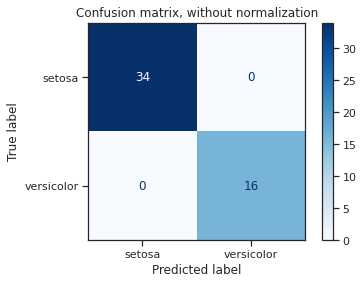

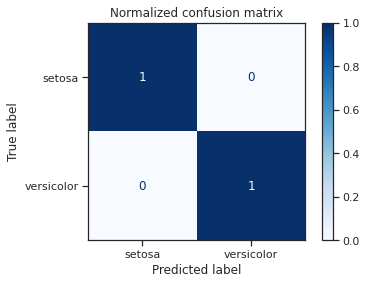

In [117]:
#Matriz de confusion 
from sklearn.metrics import plot_confusion_matrix

classifier = svm.SVC(kernel='linear', C=0.01).fit(x_train, y_train)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test, display_labels=class_names, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)


In [125]:
# Metricas de evaluación. 

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred, average='weighted')))
print('Recall Score : ' + str(recall_score(y_test,y_pred, average='weighted')))
print('F1 Score : ' + str(f1_score(y_test,y_pred, average='weighted')))

Accuracy Score : 0.54
Precision Score : 0.68
Recall Score : 0.54
F1 Score : 0.6019672131147541


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
